Registration of spatial transcriptomics data with Moscot
========================================================

This tutorial shows how to use **Moscot** for registration of spatial transcriptomics data.

- [code](https://github.com/theislab/moscot)
- [tutorial](https://moscot.readthedocs.io/en/latest/tutorials/tutorial_spatial_alignment.html)

Most of this code is taken from the original moscot tutorial, but applied to new data. 

if on colab, install packages and download data.

In [1]:
# !pip install git+https://github.com/theislab/moscot.git@main
# !pip install squidpy
# !wget https://hmgubox2.helmholtz-muenchen.de/index.php/s/Sc5i4YLfxM93T5N/download/univr-spatial.tar.gz
# !tar -xvzf ./univr-spatial.tar.gz

In [2]:
import matplotlib.pyplot as plt
import scanpy as sc

import os
import pathlib
import anndata as ad
import pandas as pd
import numpy as np
import moscot as mt
import squidpy as sq
from jax.config import config
config.update("jax_enable_x64", True)

sc.set_figure_params(figsize=(4, 4), frameon=False)

In [3]:
# set path
path = pathlib.Path("./advomics_data_spatial")

In [4]:
files = ["V10F24-105_A1.h5ad", "V10S28-371_A1.h5ad", "V10F24-105_C1.h5ad"]
adatas = {}
for f in files:
    adata = sc.read(path / f)
    adata.var_names_make_unique()
    adata.obs_names_make_unique()
    adatas[f.strip(".h5ad")] = adata

In [5]:
adata = ad.concat(adatas, label="library_id", uns_merge="unique")

/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


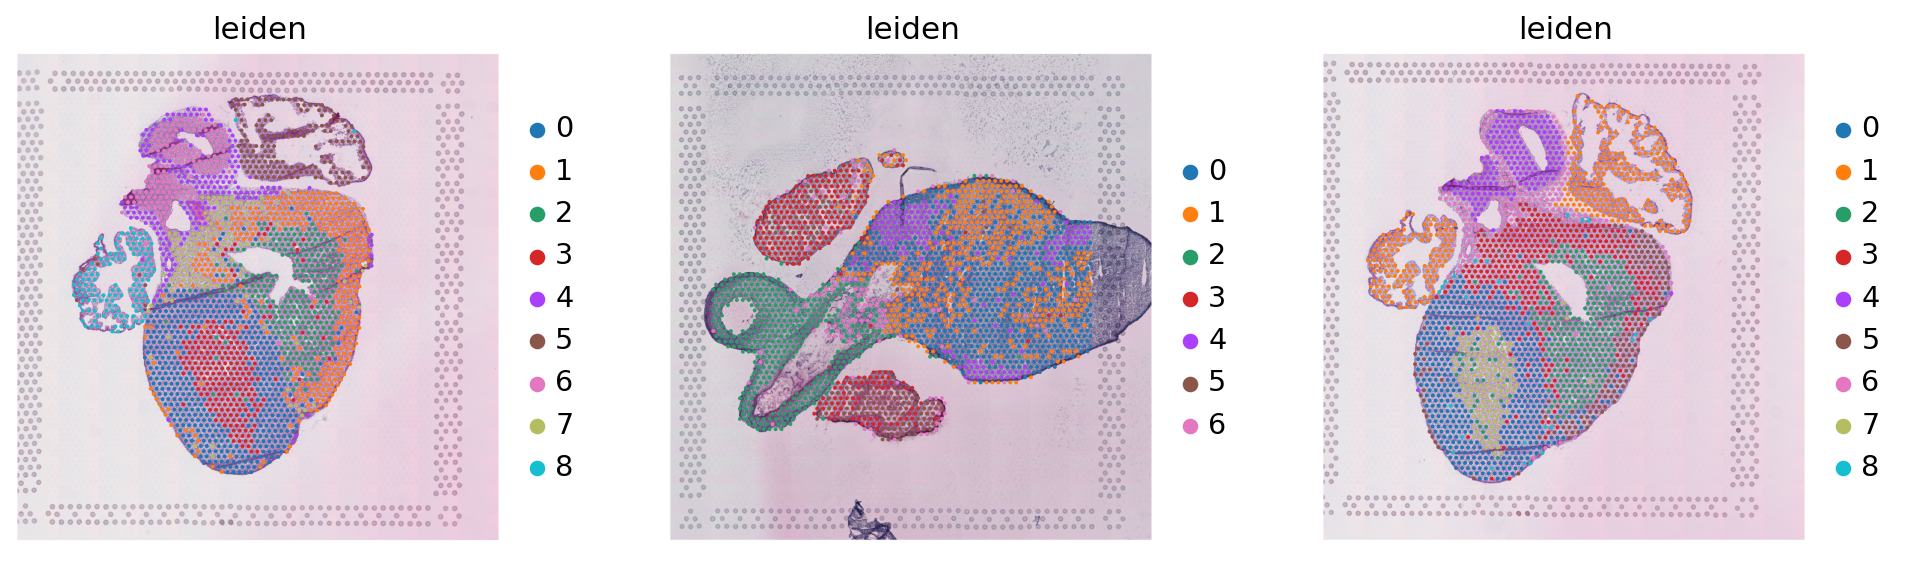

In [6]:
sq.pl.spatial_scatter(adata, library_key="library_id", color="leiden")

Let's set out to solve an alignment (registration) problem with Optimal Transport

In [7]:

ap = mt.problems.space.AlignmentProblem(adata).prepare(batch_key="library_id", policy="sequential").solve(epsilon=1e-1)

INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Solving problem OTProblem[stage='prepared', shape=(2169, 2182)].                                          
INFO     Solving problem OTProblem[stage='prepared', shape=(2182, 2250)].                                          


We can then use the optimal transport map to align the data.

In [11]:
ap.align(reference="V10F24-105_C1", mode="warp")

And visualize both aligned and original coordinates

/usr/local/lib/python3.8/dist-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/usr/local/lib/python3.8/dist-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/usr/local/lib/python3.8/dist-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


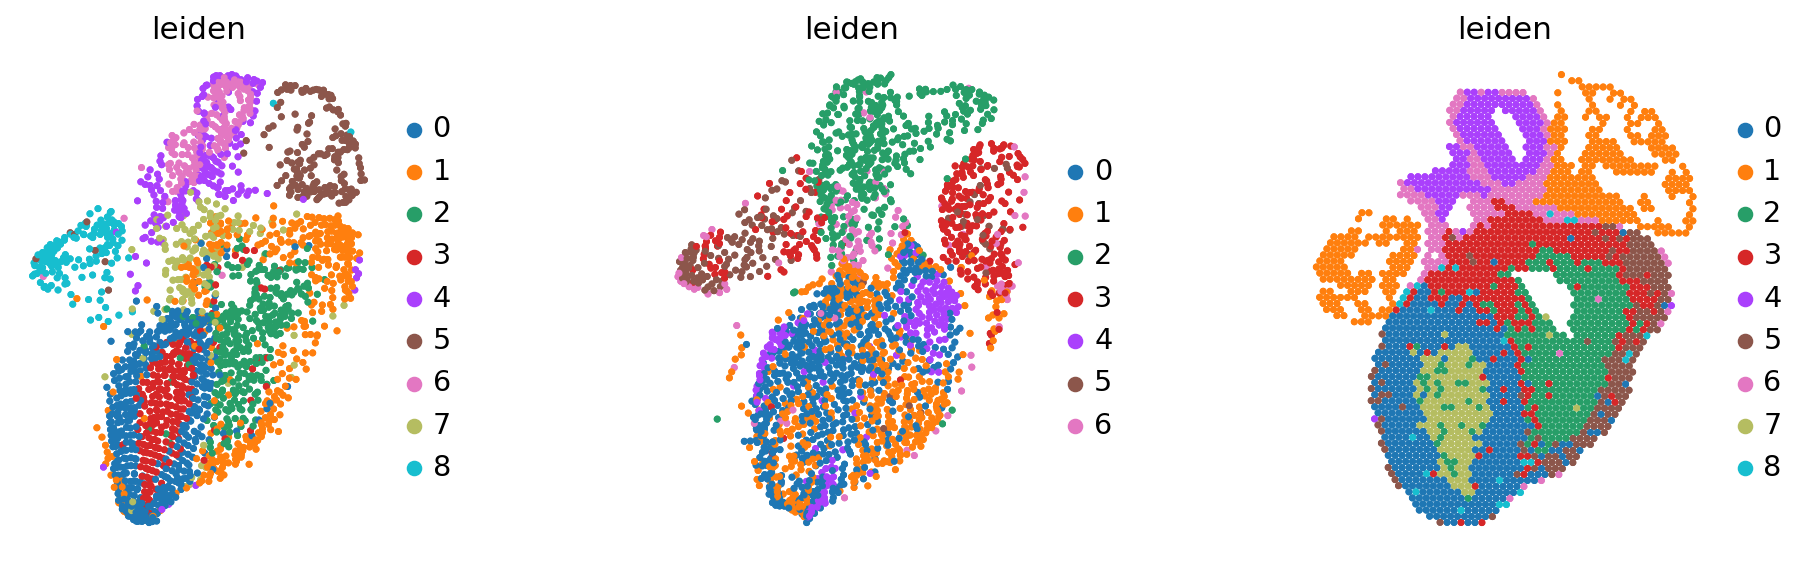

In [12]:
sq.pl.spatial_scatter(adata, library_key="library_id", color="leiden", shape=None, spatial_key="spatial_warp")

/usr/local/lib/python3.8/dist-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/usr/local/lib/python3.8/dist-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/usr/local/lib/python3.8/dist-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


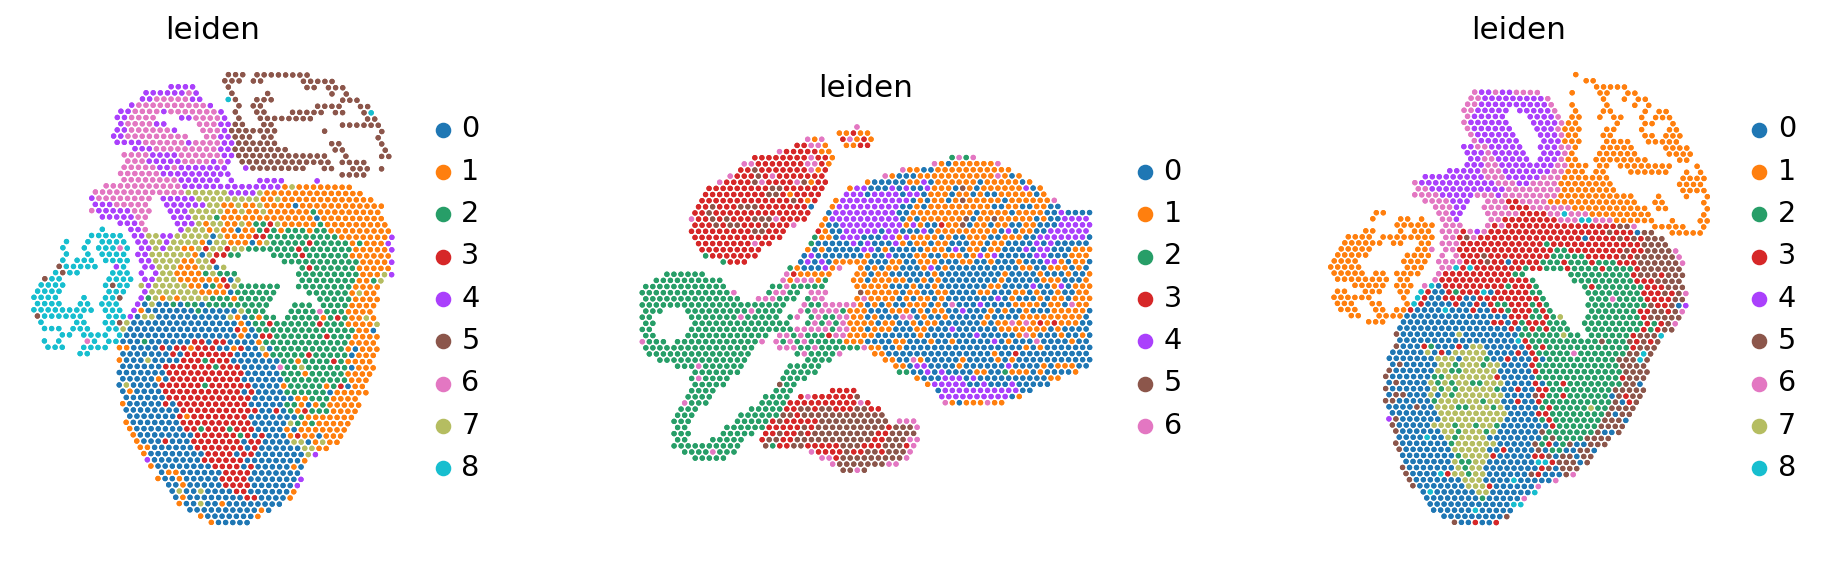

In [13]:
sq.pl.spatial_scatter(adata, library_key="library_id", color="leiden", shape=None, spatial_key="spatial")